In [1]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parcial III - Métodos Computacionales

### Nombre: Ana Sofia Del Rio

---

## ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


---

# 1

(**35 puntos**) El **método de Jacobi** es un algoritmo iterativo para resolver sistemas lineales de la forma:

$$
A \mathbf{x} = \mathbf{b},
$$

donde \$A\$ es una matriz cuadrada no singular. A diferencia del método de Gauss-Seidel, Jacobi utiliza exclusivamente los valores de la iteración anterior para actualizar todas las variables simultáneamente, lo que lo hace más sencillo de paralelizar pero, en general, con una convergencia más lenta.

## Algoritmo

Dado un sistema lineal \$A \mathbf{x} = \mathbf{b}\$, el método de Jacobi consiste en:

1. Elegir un vector inicial \$\mathbf{x}^{(0)}\$ (por ejemplo, el vector nulo).

2. Para cada iteración \$k\$ y cada componente \$i = 1, 2, ..., n\$, actualizar:

$$
x_i^{(k)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k-1)} \right)
$$

3. Repetir hasta que se cumpla un criterio de convergencia, como:

$$
\| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)} \| < \text{tolerancia}
$$

---

**a)** Escriba una función llamada `jacobi` que resuelva el sistema lineal \$A \mathbf{x} = \mathbf{b}\$ usando el método iterativo de Jacobi. La función debe aceptar como argumentos:

* La matriz \$A\$ y el vector \$\mathbf{b}\$,
* Una tolerancia (por defecto \$1\times 10^{-10}\$),
* Un número máximo de iteraciones.

Debe retornar la solución aproximada \$\mathbf{x}\$ y el número de iteraciones realizadas.

---

**b)** Aplique su función para resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
10x_1 - x_2 + 2x_3 = 6 \\[2mm]
-2x_1 + 11x_2 - x_4 = 25 \\[2mm]
3x_1 - x_2 + 10x_3 - x_4 = -11 \\[2mm]
2x_2 - x_3 + 8x_4 = 15
\end{cases}
$$

Use como vector inicial \$\mathbf{x}^{(0)} = \[0, 0, 0, 0]^T\$. Imprima la solución aproximada y el número de iteraciones necesarias para adquirir la convergencia.

---

**c)** Compare su solución con `np.linalg.solve`. ¿Qué tan cercana es la solución iterativa a la exacta? Para esto, realice un gráfico del error usando la norma euclidiana (`np.linalg.norm`) en función de la tolerancia y otro del número de iteraciones, empleando un `np.logspace(-18, -1, 18)`.

---



In [35]:
def jacobi(A, b, tol=1e-10, max_iter=100):
    '''
    Implementa el método de Jacobi para resolver un sistema matricial Ax = b
    Entradas:
        - A = Matriz cuadrada de coeficientes (array)
        - b = Vector de terminos independientes (array)
        - tol = tolerancia (1e-10)
        - max_iter = número máximos de iteraciones
    Salidas:
        - vector solución (array)
    '''
    n = len(b)
    x = np.zeros_like(b)
    x_ = np.zeros_like(x)  #Elegimos un vector inicial x_0 = vector nulo (del mismo tamaño que b)

    for iteraciones in range(max_iter):
        for i in range(n):
            suma = 0
            for j in range(n):
                if j != i: #j tiene que ser diferente de i
                    suma += A[i, j] * x[j]
            x_[i] = (b[i] - suma) / A[i, i]

        error = np.linalg.norm(x_ - x)  #verificamos la convergencia
        if error < tol:
            x[:] = x_
            return x, iteraciones+1

        x  =x_.copy()
    return x, max_iter

In [36]:
#Punto b
A= np.array ([[10, -1, 2, 0],
    [-2, 11, 0, -1],
    [3, -1, 10, -1],
    [0, 2, -1, 8]])

b = np.array ([[6, 25, -11, 15]])

sol= jacobi(A, b, tol = 1e-10, max_iter = 100)
sol

(array([[ 0,  2, -1,  1]]), 2)

In [40]:
#Punto c
sol_exacta = np.linalg.solve(A,b)
sol_exacta

ValueError: solve: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m,n)->(m,n) (size 1 is different from 4)

# 2

(**50 puntos**) El sistema **masa-resorte con fricción** es un modelo clásico en física que describe el movimiento de una masa sujeta a una fuerza restauradora (resorte) y una fuerza disipativa (fricción o viscosidad). Su dinámica está gobernada por la ecuación diferencial de segundo orden:

$$
m y''(t) + c y'(t) + k y(t) = 0,
$$

donde:

* $m$ es la masa del objeto,
* $c$ es el coeficiente de fricción (amortiguamiento),
* $k$ es la constante del resorte,
* $y(t)$ es la posición de la masa respecto a su equilibrio.

---

**a)** Reformule esta ecuación como un sistema de primer orden adecuado para ser resuelto con `solve_ivp`. Explique mediante una función explicita y realice su documentación.

---

**b)** Considere el siguiente caso:

* Masa: $m = 1$ kg
* Constante del resorte: $k = 4$ N/m
* Coeficiente de fricción: $c = 0.5$ N·s/m
* Condiciones iniciales: $y(0) = 1$, $y'(0) = 0$
* Intervalo de tiempo: $t \in [0, 20]$

Utilice `solve_ivp` para resolver el sistema y grafique $y(t)$ como $y'(t)$. Interprete el comportamiento del sistema.

---

**c)** Simule dos escenarios adicionales:

1. Sin fricción: $c = 0$
2. Con fuerte fricción: $c = 4.5$

Grafique los tres casos \$y(t)\$ en una misma figura y compare los regímenes: **no amortiguado**, **subamortiguado**, y **sobreamortiguado**.

---

**d)** Para cada uno de los tres casos, calcule la **energía mecánica total** del sistema en función del tiempo. La energía total se define como la suma de energía cinética y potencial:

$$
E(t) = \frac{1}{2} m v^2 + \frac{1}{2} k y^2
$$

Grafique $E(t)$ para los tres escenarios simulados. Analice y compare el comportamiento de la energía en cada caso. ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?


/tmp/ipython-input-1211055381.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


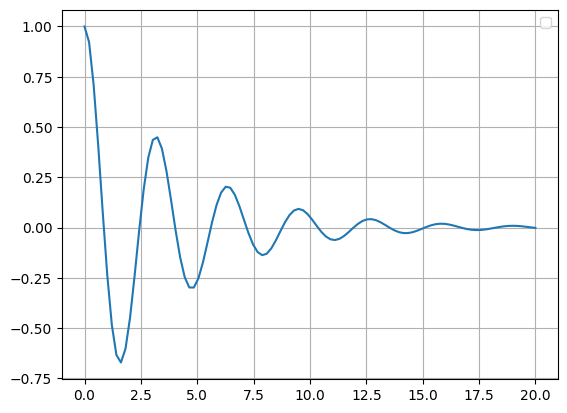

/tmp/ipython-input-1211055381.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


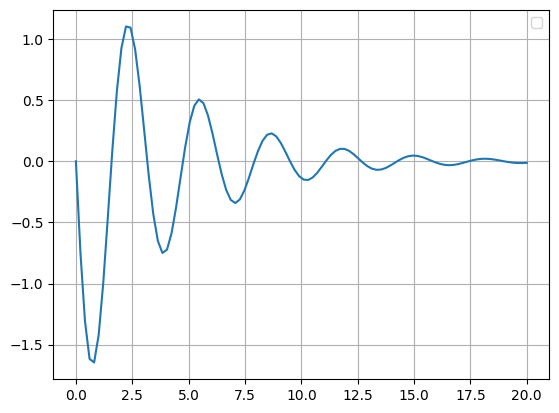

In [45]:
#Punto a
def f(t, Y):
  m, k, c = 1, 4, 0.5 #constantes
  y1, y2 = Y #cambio de variable
  dy1, dy2 = y2, (-c*y2-k*y1)/ m
  return dy1, dy2

#Punto b
y0dy0= [1, 0] #condiciones iniciales
t_span = (0, 20)
t_eval= np.linspace (0, 20, 100)
sol = solve_ivp(f, t_span, y0dy0, t_eval= t_eval )
#Graficar y(t)
plt.plot(sol.t, sol.y[0])
plt.grid()
plt.legend()
plt.show()
#Graaficar y'(t)
plt.plot(sol.t, sol.y[1])
plt.grid()
plt.legend()
plt.show()

# 3

**(15 puntos)** Sea $A$ una matriz cuadrada de tamaño $n \times n$. Dos propiedades fundamentales de los autovalores de $A$ son:

1. **Determinante**:

   $$
   \det(A) = \prod_{i=1}^{n} \lambda_i
   $$

2. **Traza**:

   $$
   \mathrm{tr}(A) = \sum_{i=1}^{n} \lambda_i
   $$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando un conjunto de matrices aleatorias $A$ de $5\times 5$ (1000 matrices diferentes), verifique numéricamente ambas propiedades. Puede emplear las funciones `np.linalg.det`, `np.trace` y `np.linalg.eigvals`.


In [4]:
n = 1000 #número de matrices a generar

for i in range(n):
    A = np.random.rand(5, 5) #generar una matriz aleatoria de 5x5

    #Calcular determinante y traza de la matriz
    det_A = np.linalg.det(A)
    tr_A = np.trace(A)

    #Calcular los autovalores de la matriz
    autovalores = np.linalg.eigvals(A)

    #Calcular el producto y la suma de los autovalores
    prod_autovalores = np.prod(autovalores)
    sum_autovalores = np.sum(autovalores)

    if not np.isclose(det_A, prod_autovalores):
        print(f'La propiedad del determinante no funcionó para la matriz {i+1}')
        break

    #Propiedad de la Traza
    if not np.isclose(tr_A, sum_autovalores):
        print(f'La propiedad de la traza no funcionó para la matriz {i+1}')
        break

print('Las dos se cumpplen para las 1000 matrices')